In [1]:
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install imblearn
!pip install xgboost
!pip install lightgbm

In [2]:
# Installing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier



In [3]:
# Having a glimpse of the data
data_df = pd.read_csv("/Users/yuvarajmandal/Desktop/Credit Fraud Analysis Using ML/creditcard.csv")
data_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


We don't need to do data exploration w.r.t target value, i.e. Class as we already know how many are there via the dataset description.

In [4]:
# Checking for any missing values
data_df.isnull().sum()
# No missing values found

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

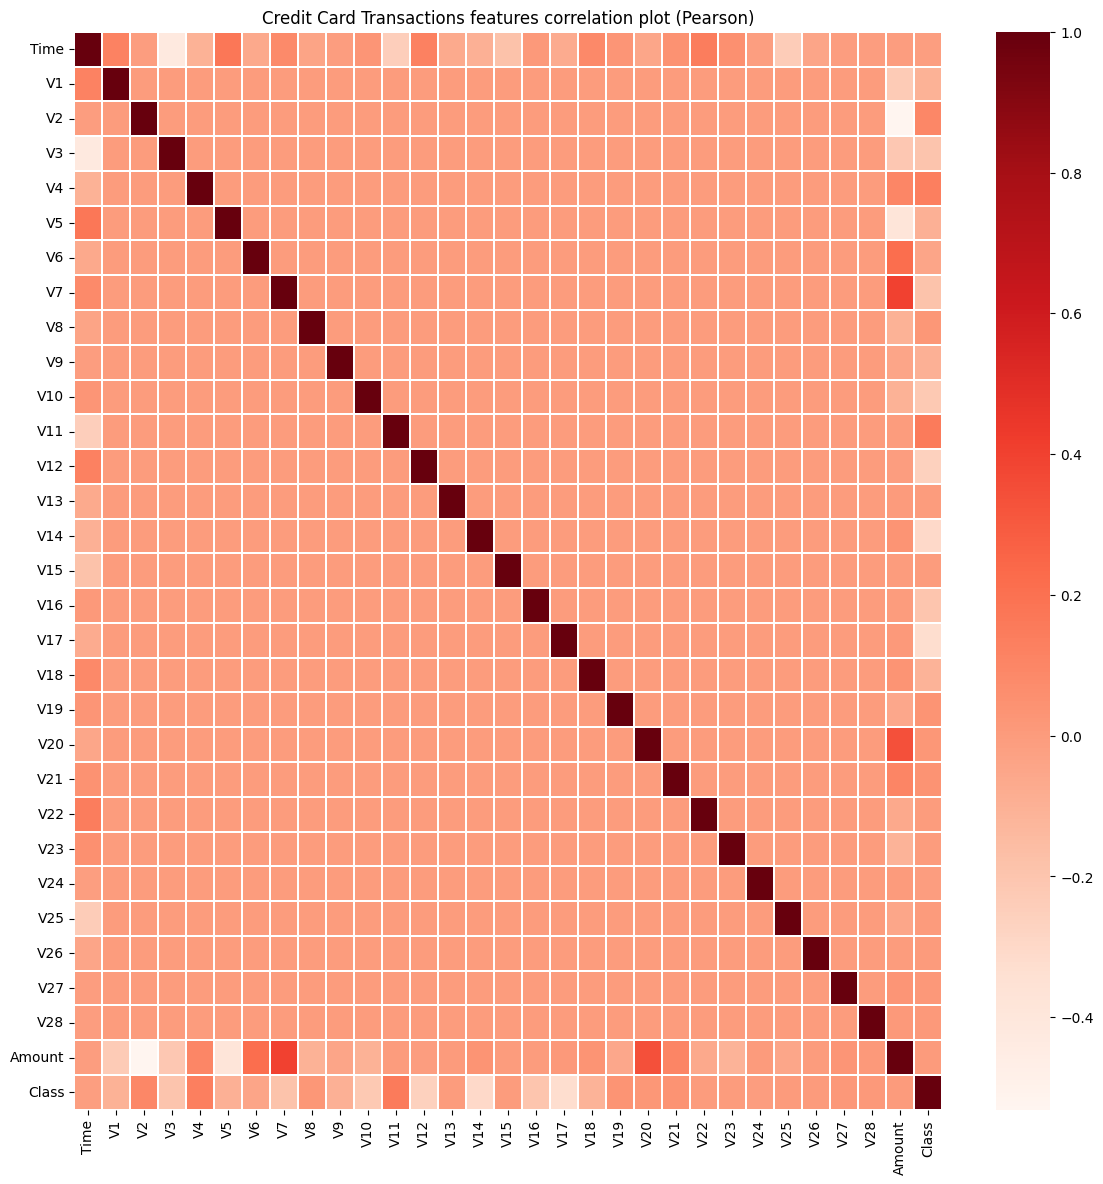

In [5]:
# Now before we proceed further, let's explore the correlation between different features in the dataset

plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = data_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Reds")
plt.show()

Clearly, the class and amount both have good degree of correlation with the variables V1 to V28. We can construct the ML models and it will predict well. There is another way of checking the same using distributional plots,

/var/folders/7l/bnwyt4p134j_wyhbtmv1jrl00000gn/T/ipykernel_19446/294670001.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(non_fraud[feature], bw=0.5, label="Class = 0")
/var/folders/7l/bnwyt4p134j_wyhbtmv1jrl00000gn/T/ipykernel_19446/294670001.py:17: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.14.0.

  sns.kdeplot(fraud[feature], bw=0.5, label="Class = 1")
/var/folders/7l/bnwyt4p134j_wyhbtmv1jrl00000gn/T/ipykernel_19446/294670001.py:16: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.5`, but please see the docs for the new parameters
and update your

<Figure size 640x480 with 0 Axes>

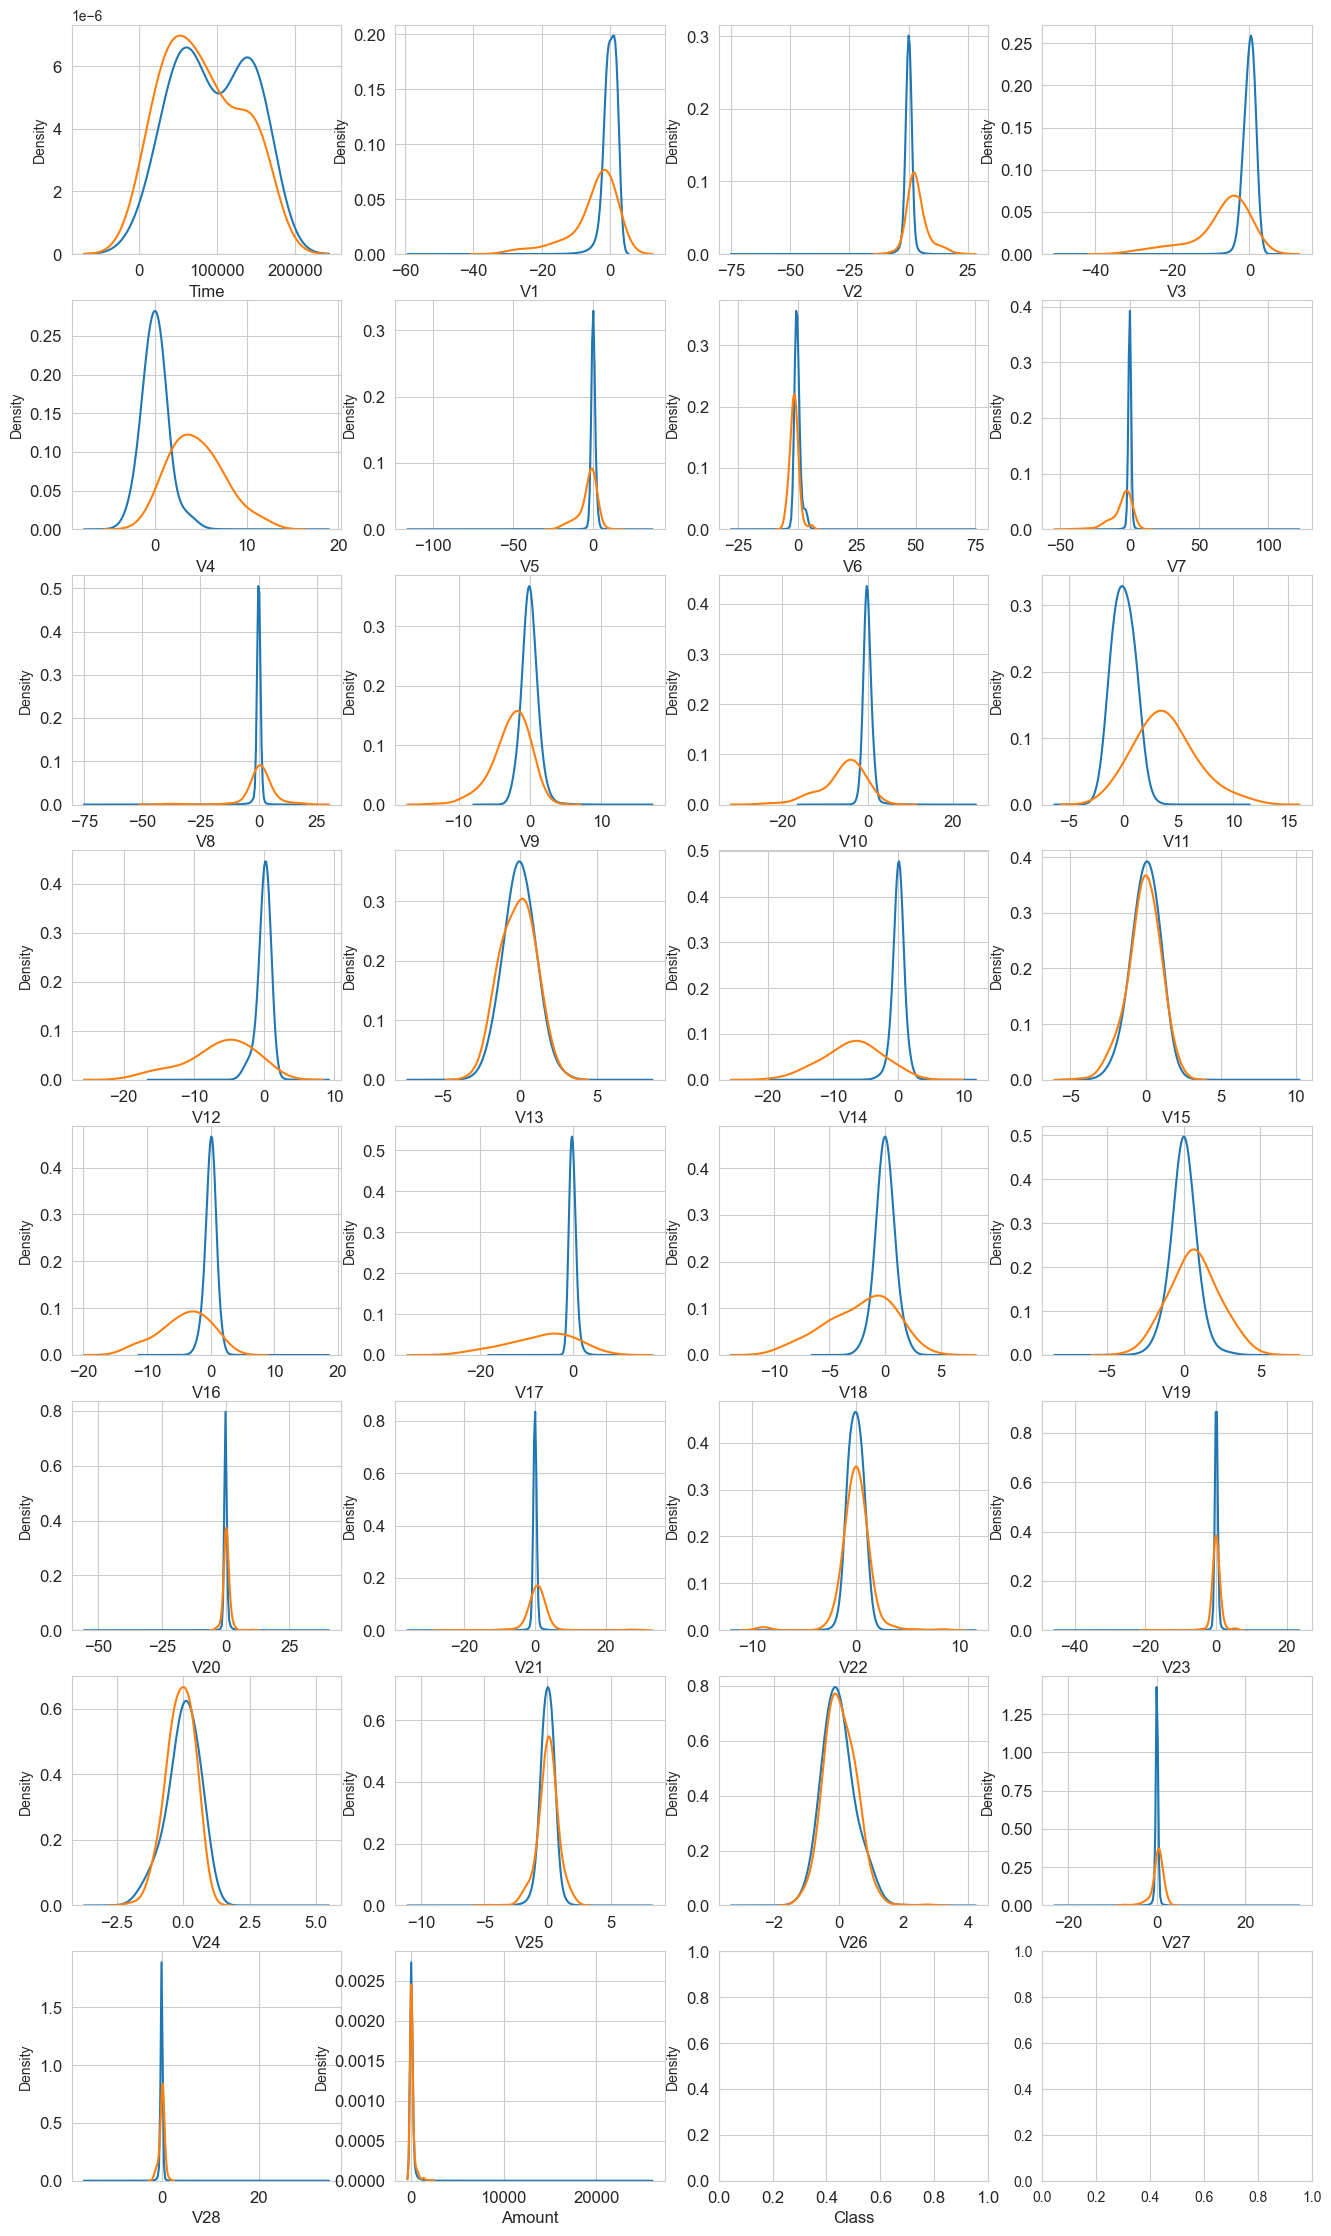

In [6]:
# Get all column names from the dataframe
columns = data_df.columns.values

# Separate the dataset into two groups based on the 'Class' label
non_fraud = data_df[data_df['Class'] == 0]
fraud = data_df[data_df['Class'] == 1]

# Set up the plot style and figure
sns.set_style('whitegrid')
plt.figure()
fig, ax = plt.subplots(8, 4, figsize=(16, 28))

# Plot the distribution of each feature for both classes
for idx, feature in enumerate(columns, 1):
    plt.subplot(8, 4, idx)
    sns.kdeplot(non_fraud[feature], bw=0.5, label="Class = 0")
    sns.kdeplot(fraud[feature], bw=0.5, label="Class = 1")
    plt.xlabel(feature, fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

# Now we will perform preprocessing of data

# We will drop 'Time' column as it is not relevant to future predictions
# Separate features and target
X = data_df.drop(['Class', 'Time'], axis=1)
y = data_df['Class']

# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

In [8]:
print(f"Train class distribution:\n{y_train.value_counts(normalize=True)}")
print(f"Test class distribution:\n{y_test.value_counts(normalize=True)}")

Train class distribution:
Class
0    0.998271
1    0.001729
Name: proportion, dtype: float64
Test class distribution:
Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [9]:
# We need to handle imblanced data before we proceed to construct ML models. We will use SMOTE for this purpose.
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

print("After SMOTE, class distribution:")
print(pd.Series(y_res).value_counts())

After SMOTE, class distribution:
Class
0    227451
1    227451
Name: count, dtype: int64


In [10]:
# Now we need to standardise the 'Amount' feature in the train dataset. Rest of the variables are already standardised as they are PCA transformed features.
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train['Amount'] = scaler.fit_transform(X_train['Amount'].values.reshape(-1, 1))
X_test['Amount'] = scaler.transform(X_test['Amount'].values.reshape(-1, 1))

In [12]:
# Now I will be implementing various ML models and checking their performance. 
# We will be using GridSearchCV for hyperparameter tuning and cross-validation. 
# Even though GridSearchCV may not produce the best outcomes, it is faster in implementation.
# The options among hyperparamters are based on commonly used values.

models = {
    "LogisticRegression": {
        "model": LogisticRegression(max_iter=1000),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "penalty": ["l1", "l2"],
            "solver": ["liblinear"]
        },
        "use_smote": True  # We will use SMOTE-balanced data
    },

    "XGBoost": {
        "model": XGBClassifier(
            objective='binary:logistic',
            random_state=42
        ),
        "params": {
            "n_estimators": [200, 400, 600],
            "max_depth": [3, 5, 7],
            "learning_rate": [0.01, 0.1],
            "subsample": [0.8, 1.0],
            "colsample_bytree": [0.8, 1.0],
            "scale_pos_weight": [len(y_train[y_train==0]) / len(y_train[y_train==1])]
        },
        "use_smote": False  # XGBoost handles imbalance internally using scale_pos_weight
    },

    "LightGBM": {
        "model": LGBMClassifier(
            objective='binary',
            random_state=42
        ),
        "params": {
            "num_leaves": [31, 50],
            "max_depth": [-1, 7, 10],
            "learning_rate": [0.01, 0.05, 0.1],
            "n_estimators": [200, 400],
            "scale_pos_weight": [len(y_train[y_train==0]) / len(y_train[y_train==1])]
        },
        "use_smote": False  # LightGBM also supports scale_pos_weight
    }
}

In [13]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import average_precision_score

results = []  # We will store results for comparing later on

for name, m in models.items():
    print(f"\nTraining {name} ")

    # Choosing which dataset to train on (SMOTE or original) depending on the model
    X_fit, y_fit = (X_res, y_res) if m["use_smote"] else (X_train, y_train)

    # Using AUPRC (average precision) as the scoring metric
    search = GridSearchCV(
        estimator=m["model"],
        param_grid=m["params"],
        scoring="average_precision",
        cv=3,
        n_jobs=-1,
    )

    # Fit model on training data
    search.fit(X_fit, y_fit)

    # Retrieve best model and parameters
    best_model = search.best_estimator_
    print(f" Best Params for {name}: {search.best_params_}")

    # Predict probabilities for the test set
    y_proba = best_model.predict_proba(X_test)[:, 1]
    # Convert probabilities to binary predictions (threshold = 0.5)
    y_pred = (y_proba >= 0.5).astype(int)

    # Compute metrics
    auprc = average_precision_score(y_test, y_proba)

    results.append({
    "Model": name,
    "Best Params": search.best_params_,
    "AUPRC": auprc,
    })


Training LogisticRegression 
 Best Params for LogisticRegression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}

Training XGBoost 
 Best Params for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 600, 'scale_pos_weight': 577.2868020304569, 'subsample': 0.8}

Training LightGBM 
[LightGBM] [Info] Number of positive: 263, number of negative: 151634
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003822 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 7395
[LightGBM] [Info] Number of data points in the train set: 151897, number of used features: 29
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.001731 -> initscore=-6.357071
[LightGBM] [Info] Start training from score -6.357071
[LightGBM] [Info] Number of positive: 262, number of negative: 151634
[LightGBM] [Info] Number of positive: 263, numbe

In [14]:
results_df = pd.DataFrame(results)
print("\n==================== MODEL COMPARISON ====================\n")
print(results_df.sort_values(by="AUPRC", ascending=False))

# Optional: print classification report for best model
best_model_name = results_df.sort_values(by="AUPRC", ascending=False).iloc[0]["Model"]
print(f"\n Best performing model: {best_model_name}")


==================== MODEL COMPARISON ====================

                Model                                        Best Params  \
1             XGBoost  {'colsample_bytree': 0.8, 'learning_rate': 0.1...   
2            LightGBM  {'learning_rate': 0.01, 'max_depth': 7, 'n_est...   
0  LogisticRegression  {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}   

      AUPRC  
1  0.880530  
2  0.810556  
0  0.730258  

 Best performing model: XGBoost
